# Multimodal Transformer Model - MOSI

In [ ]:
!git clone https://github.com/M-Jafarkhani/Multimodal-Emotion-Recognition

## Importing Libraries

In [3]:
import gdown

file_id = "1_XdzdW8UNG1TTS6QcX10uhoS6N11OBit"
destination = "mosi_data.pkl" 

gdown.download(
    f"https://drive.google.com/uc?id={file_id}", destination, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1_XdzdW8UNG1TTS6QcX10uhoS6N11OBit
From (redirected): https://drive.google.com/uc?id=1_XdzdW8UNG1TTS6QcX10uhoS6N11OBit&confirm=t&uuid=6a5037f6-9f9a-436d-8344-abea544d380b
To: /content/mosi_data.pkl
100%|██████████| 154M/154M [00:02<00:00, 55.1MB/s]


'mosi_data.pkl'

In [4]:
import sys
import torch
import matplotlib.pyplot as plt

sys.path.append('/content/Multimodal-Emotion-Recognition/src')

## Importing Helper Functions

In [5]:
from loader import get_dataloader
from unimodals.modules import Identity
from fusions.multimodal import MULTModel
from training.supervised import train, test
from utils import get_default_device, save_results

## Loading the Dataset

In [6]:
train_data, valid_data, test_data = get_dataloader('/content/mosi_data.pkl', max_pad=True)

In [7]:
device = get_default_device()
print(device)

cuda


## Model Architecture

In [8]:
class HParams():
    num_heads = 8
    layers = 4
    attn_dropout = 0.1
    attn_dropout_modalities = [0, 0, 0.1]
    relu_dropout = 0.1
    res_dropout = 0.1
    out_dropout = 0.1
    embed_dropout = 0.2
    embed_dim = 40
    attn_mask = True
    output_dim = 1
    all_steps = False

encoders = [
    Identity().to(device),
    Identity().to(device),
    Identity().to(device)
]

fusion = MULTModel(3, [20, 5, 300], hyp_params=HParams).to(device)

head = Identity().to(device)

## Training

In [9]:
OUTPUT_MODEL_FILE_NAME = "MOSI_Multimodal_Transformer"

train_losses, valid_losses = train(
    encoders,
    fusion,
    head,
    train_data,
    valid_data,
    100,
    task="regression",
    optimtype=torch.optim.AdamW,
    early_stop=False,
    is_packed=False,
    lr=1e-3,
    clip_val=1.0,
    save=f"/content/{OUTPUT_MODEL_FILE_NAME}.pt",
    weight_decay=0.01,
    objective=torch.nn.L1Loss(),
)

Epoch [1/100]
Train Loss: 1.3074
Valid Loss: 1.7965
Saving Best

Epoch [2/100]
Train Loss: 1.1202
Valid Loss: 1.3395
Saving Best

Epoch [3/100]
Train Loss: 1.0061
Valid Loss: 1.0677
Saving Best

Epoch [4/100]
Train Loss: 0.9240
Valid Loss: 1.0052
Saving Best

Epoch [5/100]
Train Loss: 0.8921
Valid Loss: 1.0634

Epoch [6/100]
Train Loss: 0.8687
Valid Loss: 0.9495
Saving Best

Epoch [7/100]
Train Loss: 0.7684
Valid Loss: 1.0464

Epoch [8/100]
Train Loss: 0.7480
Valid Loss: 0.9662

Epoch [9/100]
Train Loss: 0.7241
Valid Loss: 1.0450

Epoch [10/100]
Train Loss: 0.7157
Valid Loss: 0.9647

Epoch [11/100]
Train Loss: 0.6739
Valid Loss: 0.9314
Saving Best

Epoch [12/100]
Train Loss: 0.6737
Valid Loss: 0.9330

Epoch [13/100]
Train Loss: 0.6368
Valid Loss: 0.9133
Saving Best

Epoch [14/100]
Train Loss: 0.6246
Valid Loss: 0.9640

Epoch [15/100]
Train Loss: 0.5886
Valid Loss: 0.9651

Epoch [16/100]
Train Loss: 0.5929
Valid Loss: 0.9281

Epoch [17/100]
Train Loss: 0.5521
Valid Loss: 0.9849

Epoch [

Text(0.5, 1.0, 'Loss vs. No. of epochs')

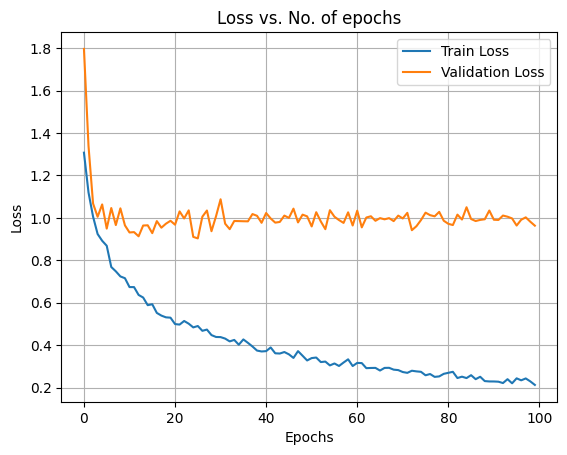

In [10]:
plt.plot(train_losses, label='Train Loss')
plt.plot(valid_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title('Loss vs. No. of epochs')

In [11]:
save_results(train_losses, valid_losses, f'/content/{OUTPUT_MODEL_FILE_NAME}.pkl')

## Testing

In [12]:
model = torch.load(f"/content/{OUTPUT_MODEL_FILE_NAME}.pt").to(device)

test(
    model,
    test_dataloaders_all=test_data,
    is_packed=False,
    criterion=torch.nn.L1Loss(),
    task="posneg-classification"
)


<ipython-input-12-bcf0b2d6e777>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(f"/content/{OUTPUT_MODEL_FILE_NAME}.pt").to(device)


Recall: 75.6098% | Total Accuracy: 75.2187%
Inference Time: 1s599ms
Inference Params: 3076961
